In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')

# MOSTRAR - Head
# pfEnade.head()
# MOSTRAR - o tipo de dados
# pfEnade.info()

# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
# pfEnade.groupby("Tempo").count()
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
#pfEnade.groupby("Publica").count()
pfEnade = doHumanasExatas(pfEnade)
#pfEnade['Exatas'].value_counts()

pfEnade = doMigracao(pfEnade)

# TRATAMENTOS - Dicionários
pfEnade = doRenda(pfEnade)
pfEnade['Renda'].value_counts().sort_index()
# pfEnade.isna().sum()    # Mostra se há vazios
pfEnade = doEscolaridade(pfEnade)


0         3
1     16959
2     86147
3     60002
4    137024
5     64978
6     24555
Name: EPai, dtype: int64

In [3]:
pfEnade['Migrado'].value_counts().sort_index()

0    335492
1     54176
Name: Migrado, dtype: int64

In [ ]:
# VISUALIZAR - Renda
pfEnade.filter(items=['QE_I08', 'RendaDesc']).groupby('RendaDesc').count() #.sort_values(by='QE_I08', ascending=False)
renda = pfEnade.filter(items=['QE_I08', 'RendaDesc']).groupby('RendaDesc').count() #.sort_values(by='QE_I08', ascending=False)
renda.plot()

In [ ]:
# TRATAR - BOXPLOT - Tempo - Retirar outliers
pfEnade = pfEnade.query('Tempo < 7')
# stats.skew(pfEnade.Tempo)   # Pearson
fig = px.box(pfEnade, y='Tempo')
fig.update_layout(width=500, height=500)
fig.show()

In [ ]:
# HISTOGRAMA - Renda
pfEnade['Renda'].hist(bins=5)

In [ ]:
# PERCENTUAL - Renda
distRenda = pfEnade['Renda'].value_counts()

percentRenda = [100*x/distRenda.sum() for x in distRenda]
percentRenda

In [ ]:
# PLOT - Comparativo de Reda
pfEnade.groupby('Renda').hist()

In [ ]:
# PERCENTUAL - Escolaridade do Pai
distEscolaridade = pfEnade['EPai'].value_counts()

percentEscolaridade = [100*x/distEscolaridade.sum() for x in distEscolaridade]
percentEscolaridade

In [ ]:
pfEnade['EscolaridadeDesc']

In [ ]:
# PLOT - Comparativo de Escolaridade do Pai
pfEnade.groupby('Renda').hist()

In [ ]:
pfEnade.groupby('Renda').hist()

In [ ]:
pfEnade.plot.scatter('Publica','Renda')

In [ ]:
pfEnade.dtypes

Migrado
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

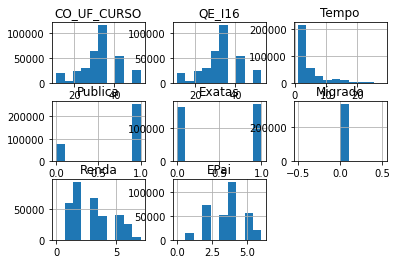

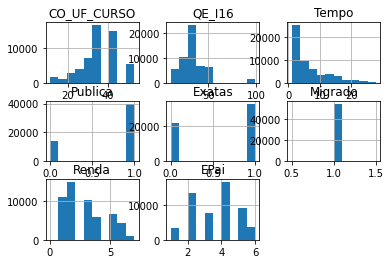

In [4]:
# PLOT - Comparativo de Reda
pfEnade.groupby(''Migrado'').hist()